In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib ipympl

## 1-d Heat Eq
Stability Condition
$$
\Delta t <= \frac{0.5 (\Delta x)^2}{\alpha}
$$
$$
\frac{\partial T}{\partial t} = c^2 \frac{\partial ^2T}{\partial x^2}
$$
$$
T_{t+1, i} = T_{t,i} + \frac{\alpha \delta t}{h^2}  \left(T_{t,i+1} - 2 T_{t,i} + T_{t,i-1} \right)
$$

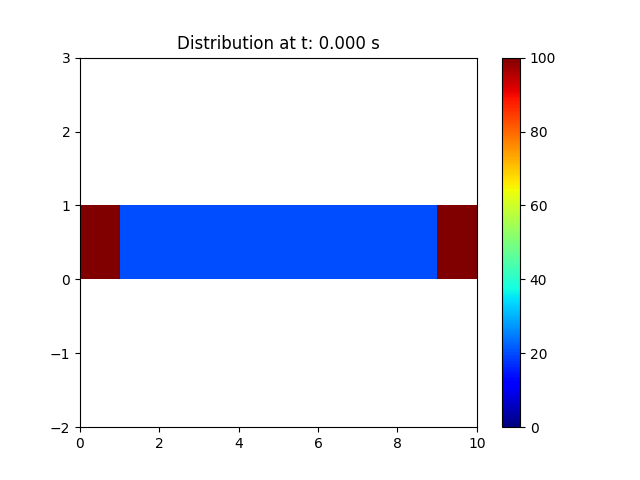

In [7]:
a = 110
length = 50
time = 4
nodes = 10

#init
dx = length / nodes
dt = 0.5 * dx ** 2 /a
t_nodes = int(time/dt)

#boundary
u = np.zeros(nodes) + 20
u[0] = 100
u[-1] = 100


#plot
fig, axis = plt.subplots()
pcm = axis.pcolormesh([u], cmap=plt.cm.jet, vmin=0, vmax=100)
plt.colorbar(pcm, ax=axis)
axis.set_ylim([-2, 3])
axis.set_title("Distribution at t: {:.3f} s".format(0))

#simulations
counter = 0

def update(frame):
    global u
    w = u.copy()
    for i in range(1, nodes - 1):
        u[i] = dt * a * (w[i-1] - 2*w[i] + w[i+1]) / dx **2 + w[i]
    
    pcm.set_array(u[None, :])
    axis.set_title("Distribution at t: {:.3f} s".format(frame * dt))
    return pcm,

# Create animation
ani = FuncAnimation(fig, update, frames=t_nodes, interval=50, blit=True, repeat=True)

plt.show()


#while counter < time:
#    w = u.copy()
#    for i in range(1, nodes - 1):
#        u[i] = dt * a * (w[i-1] - 2*w[i] + w[i+1]) / dx **2 + w[i]#
#
#    counter += dt
#    print("t: {:.3f} [s], Average temp: {:.2f} C".format(counter, np.average(u)))
#    
#    #update plot
#    pcm.set_array([u])
#    axis.set_title("Distribution at t: {:.3f} s".format(counter))
#    plt.pause(0.01)

#plt.show()
